In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer


In [83]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v3.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de depressão,Diagnóstico de alcoolismo
0,11.0,2.0,36.0,1.0,1.0,1.0,2.0,0.0,3.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0
1,11.0,1.0,54.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0
2,11.0,1.0,51.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0
3,11.0,2.0,24.0,4.0,1.0,1.0,2.0,0.0,4.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0
4,11.0,1.0,65.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0


In [84]:
# Padronização do dataset (média e desvio padrão, valores entre -1 e 1)

defaut_df = (df - df.mean()) / df.std()
defaut_df

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de depressão,Diagnóstico de alcoolismo
0,-1.820040,0.721360,-0.818803,-1.035448,-0.775740,-0.636859,0.947754,-0.239913,0.848342,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,0.993316,-0.225087
1,-1.820040,-1.386187,0.243693,-1.035448,-0.775740,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,0.993316,-0.225087
2,-1.820040,-1.386187,0.066610,-1.035448,-0.775740,-0.636859,0.947754,-0.239913,0.437458,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,0.993316,-0.225087
3,-1.820040,0.721360,-1.527133,1.052122,-0.775740,-0.636859,0.947754,-0.239913,1.259226,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,0.993316,-0.225087
4,-1.820040,-1.386187,0.892995,1.052122,-0.775740,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,0.993316,-0.225087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.815839,0.721360,0.125638,-1.035448,0.202448,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,0.149584,-0.306041,-0.732802,0.067725,0.361303,0.668078,1.509260,1.181264,-1.006669,-0.225087
16772,1.815839,0.721360,1.837435,-1.035448,0.202448,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,0.149584,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,0.819683,-1.006669,-0.225087
16773,1.815839,-1.386187,0.184665,0.356266,1.180637,0.413264,2.447850,-0.239913,0.848342,1.455807,...,1.877444,0.052814,0.220847,0.067725,0.361303,-0.494182,-0.286184,0.232115,-1.006669,-0.225087
16774,1.815839,0.721360,0.302720,-1.035448,1.180637,1.463387,2.447850,1.033751,2.491879,1.455807,...,0.725538,0.052814,2.128144,1.754666,2.386771,-0.494182,-0.286184,0.729288,-1.006669,4.442470


In [85]:
# defaut_df = (defaut_df - defaut_df.min()) / (defaut_df.max() - defaut_df.min())
# defaut_df

In [86]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

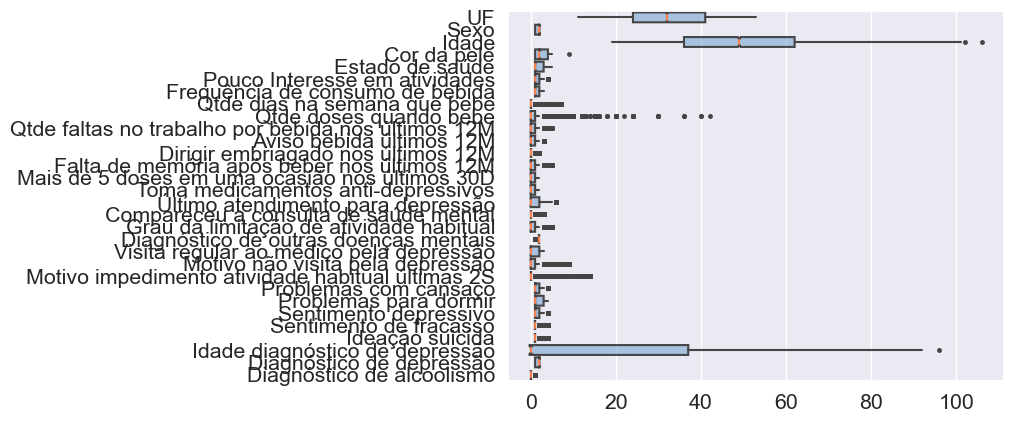

In [87]:
Outlier(df)

In [88]:
min_max_scaler = preprocessing.MinMaxScaler()
x = df.values # Retorna um array do tipo numpy
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

normalized_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.195402,0.000,0.00,0.000000,0.5,0.000000,0.071429,0.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
1,0.0,0.0,0.402299,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
2,0.0,0.0,0.367816,0.000,0.00,0.000000,0.5,0.000000,0.047619,0.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
3,0.0,1.0,0.057471,0.375,0.00,0.000000,0.5,0.000000,0.095238,0.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
4,0.0,0.0,0.528736,0.375,0.00,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.0,1.0,0.379310,0.000,0.25,0.000000,0.0,0.000000,0.000000,0.0,...,0.111111,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.468750,0.0,0.0
16772,1.0,1.0,0.712644,0.000,0.25,0.000000,0.0,0.000000,0.000000,0.0,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385417,0.0,0.0
16773,1.0,0.0,0.390805,0.250,0.50,0.333333,1.0,0.000000,0.071429,0.2,...,0.444444,0.071429,0.333333,0.333333,0.333333,0.000000,0.000000,0.250000,0.0,0.0
16774,1.0,1.0,0.413793,0.000,0.50,0.666667,1.0,0.142857,0.166667,0.2,...,0.222222,0.071429,1.000000,1.000000,1.000000,0.000000,0.000000,0.364583,0.0,1.0


In [89]:
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução
array = df.values
array

array([[11.,  2., 36., ...,  0.,  2.,  0.],
       [11.,  1., 54., ...,  0.,  2.,  0.],
       [11.,  1., 51., ...,  0.,  2.,  0.],
       ...,
       [53.,  1., 53., ..., 24.,  1.,  0.],
       [53.,  2., 55., ..., 35.,  1.,  1.],
       [53.,  1., 58., ..., 53.,  1.,  0.]])

In [90]:
X = array[:,0:len(normalized_df.columns)-1]
Y = array[:,len(normalized_df.columns)-1]
# X = normalized_df
# Y = normalized_df.drop(['Diagnóstico de depressão', 'Diagnóstico de alcoolismo'], axis=1)


print("X:", len(X), "Y:", len(Y))


X: 16776 Y: 16776


In [91]:
test_size = 0.4 # Tamanho do conjunto de teste
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [92]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)

Text(0.5, 1.0, 'Matriz de Confusão')

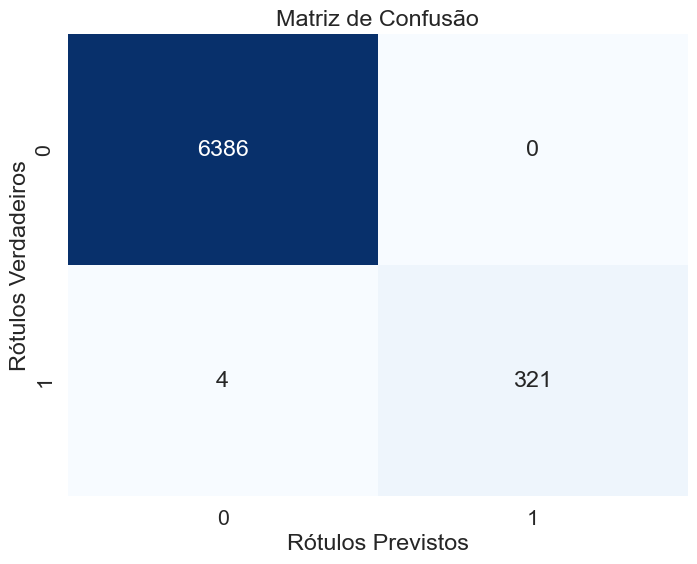

In [93]:

# Calcule a matriz de confusão
cm = confusion_matrix(Y_test, predictions)

# Crie uma figura e um eixo para o plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Ajusta o tamanho da fonte

# Use o seaborn para criar um heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configuração de rótulos e títulos
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')

In [94]:
report = classification_report(Y_test, predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.0,1.00,1.00,6386.0
1.0,1.0,0.99,0.99,325.0
accuracy,1.0,1.00,1.00,1.0
macro avg,1.0,0.99,1.00,6711.0
weighted avg,1.0,1.00,1.00,6711.0


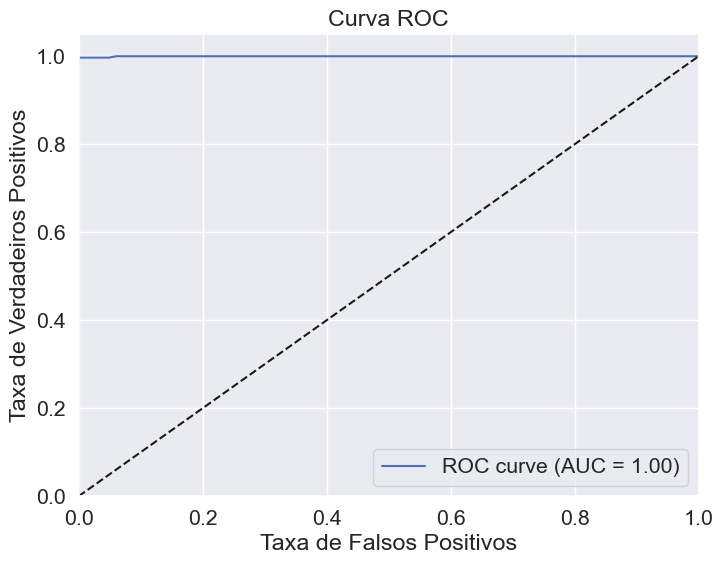

In [95]:
probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(Y_test, probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

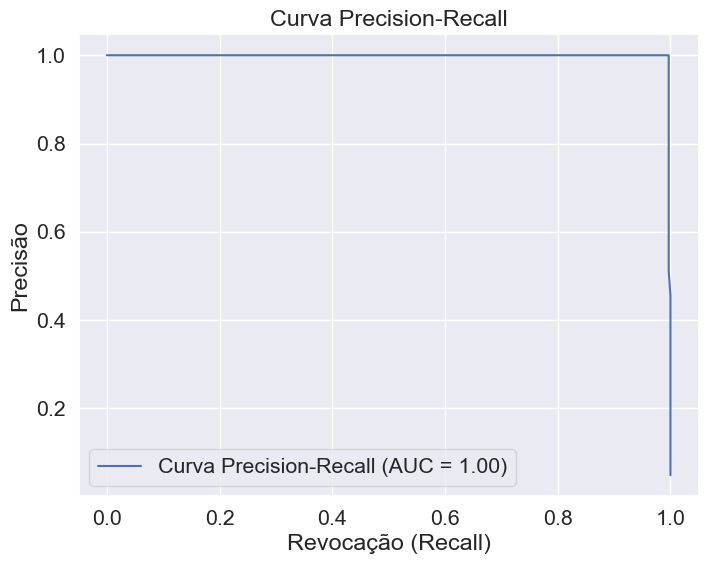

In [96]:
precision, recall, thresholds = precision_recall_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(Y_test, probs)))
plt.xlabel('Revocação (Recall)')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

In [97]:
rf = RandomForestRegressor()

rf.fit(X_train, Y_train)
predict = rf.predict(X_test)
explained_variance = metrics.explained_variance_score(Y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(Y_test, predict) 
mse = metrics.mean_squared_error(Y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(Y_test, predict)
median_absolute_error = metrics.median_absolute_error(Y_test, predict)
r2 = metrics.r2_score(Y_test, predict)

# Mostrando o resultado de desempenho do modelo
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))


Ex.V:  0.9968706740225012
MSLE:  5.710100779059776e-05
R2  :  0.9968699568768219
MAE :  0.00030993890627328266
MSE :  0.00014424079868872002
RMSE:  0.012010029087754951


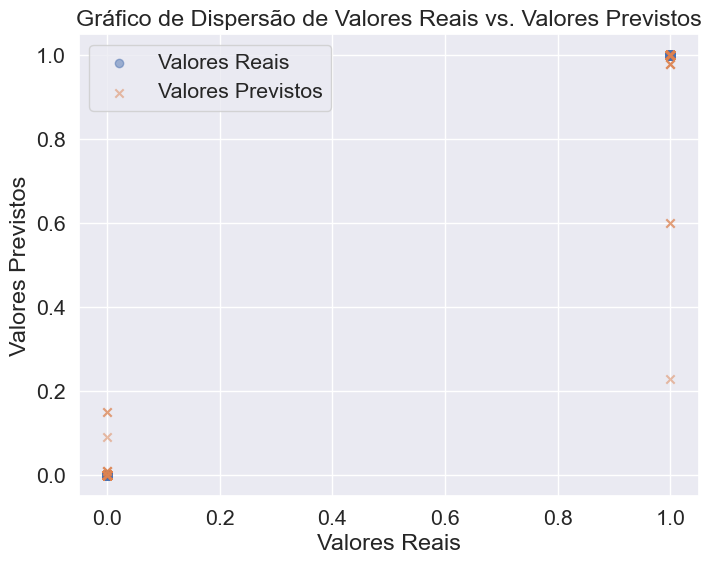

In [98]:
# Suponha que Y_test contenha os valores reais e predict contenha os valores previstos.

plt.figure(figsize=(8, 6))

# Plotagem dos valores reais com marcador 'o' (círculos)
plt.scatter(Y_test, Y_test, alpha=0.5, label='Valores Reais', marker='o')

# Plotagem dos valores previstos com marcador 'x' (cruz)
plt.scatter(Y_test, predict, alpha=0.5, label='Valores Previstos', marker='x')

plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão de Valores Reais vs. Valores Previstos')
plt.legend()  # Adiciona uma legenda ao gráfico

plt.show()

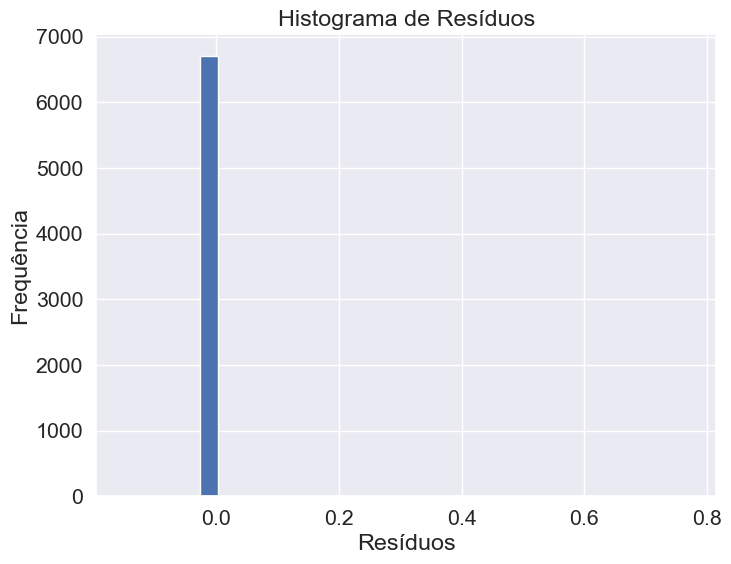

In [99]:
# Histograma de Resíduos
residuals = Y_test - predict
residuals = np.ravel(residuals)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.show()


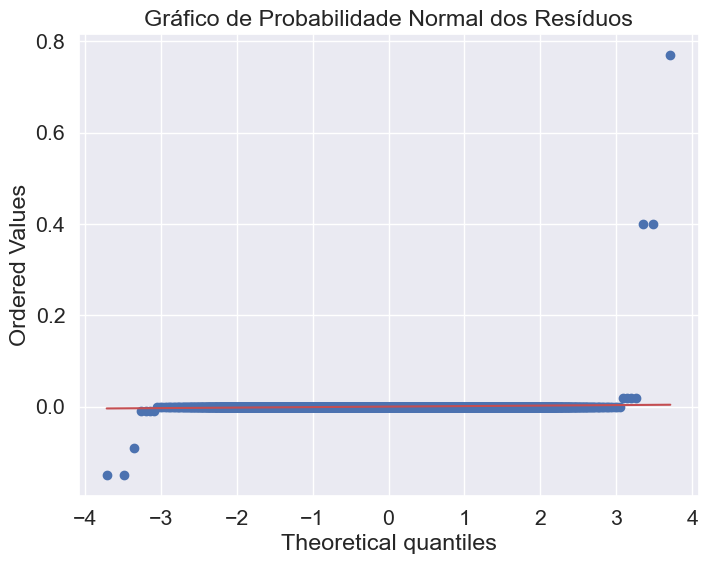

In [100]:
# Gráfico de Probabilidade Normal dos Resíduos
from scipy import stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('Gráfico de Probabilidade Normal dos Resíduos')
plt.show()

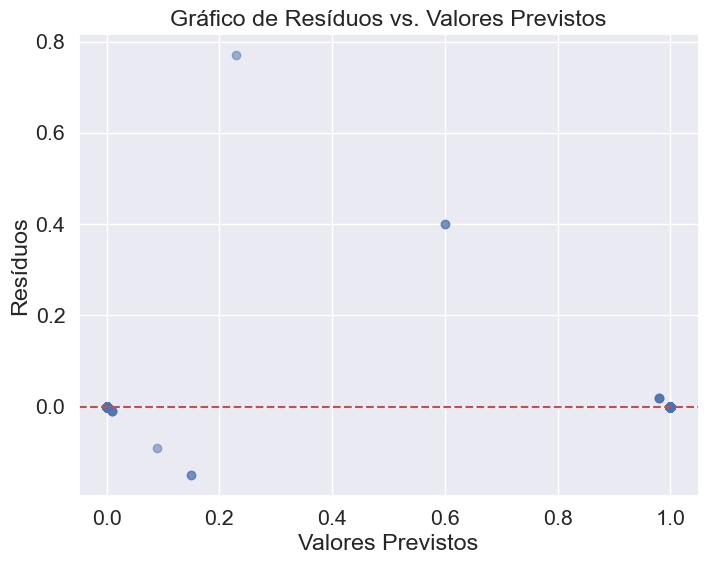

In [101]:
# Calcular os resíduos
plt.figure(figsize=(8, 6))
plt.scatter(predict, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Linha de referência dos resíduos igual a zero
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.show()

In [102]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, Y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

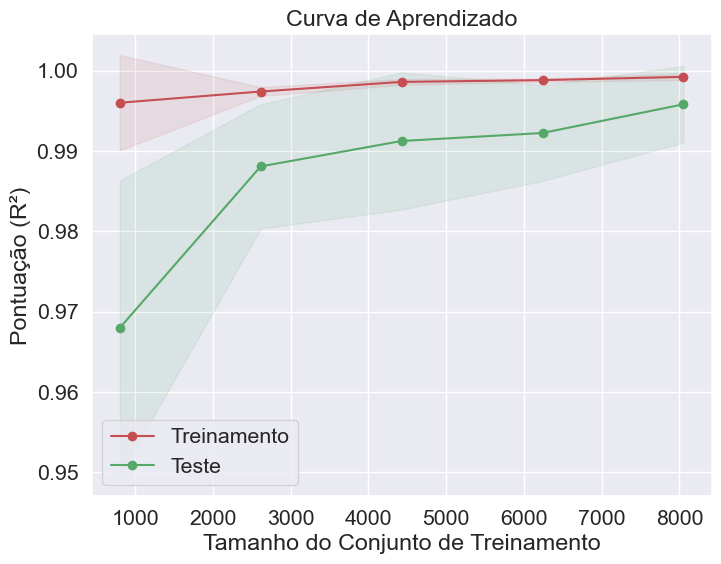

In [103]:
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Teste")
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação (R²)')
plt.legend(loc="best")
plt.title('Curva de Aprendizado')
plt.show()